##  なぜ勾配を利用するのか

### 勾配を利用した計算の効率化

In [4]:
using Distributions, PyPlot, ForwardDiff, LinearAlgebra

# n次元単位行列
eye(n) = Diagonal{float64}(I, n)

# パラメータ抽出用の関数
unzip(a) = map(x->(getfield.(a, x)), fieldnames(eltype(a)))

function set_options(ax, xlabel, ylabel, title;
                     grid=true, gridy=false, legend=false)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    if grid
        if gridy
            ax.grid(axis="y")
        else
            ax.grid()
        end
    end
    legend && ax.legend()
end

set_options (generic function with 1 method)

## ラプラス近似

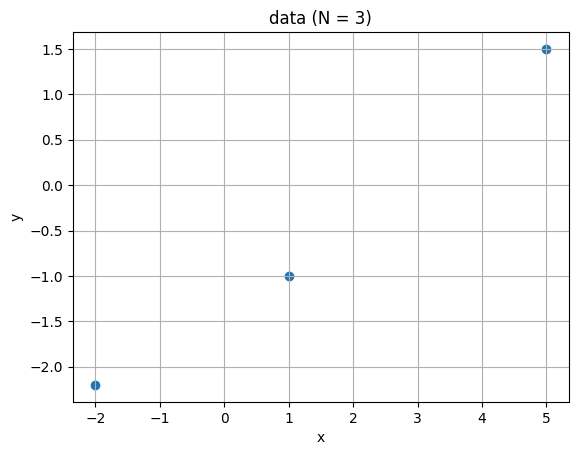

false

In [6]:
# 入力データセット
X_obs = [-2, 1, 5]

# 出力データセット
Y_obs = [-2.2, -1.0, 1.5]

# 散布図で可視化
fig, ax = subplots()
ax.scatter(X_obs, Y_obs)
set_options(ax, "x", "y", "data (N = $(length(X_obs)))")

### 線型回帰（単一パラメータ）

In [7]:
# 切片はゼロで固定
w₂ = 0

# yに付加されるノイズの標準偏差
σ = 1.0

# 事前分布の平均値と標準偏差
μ₁ = 0.0
σ₁ = 10.0

10.0

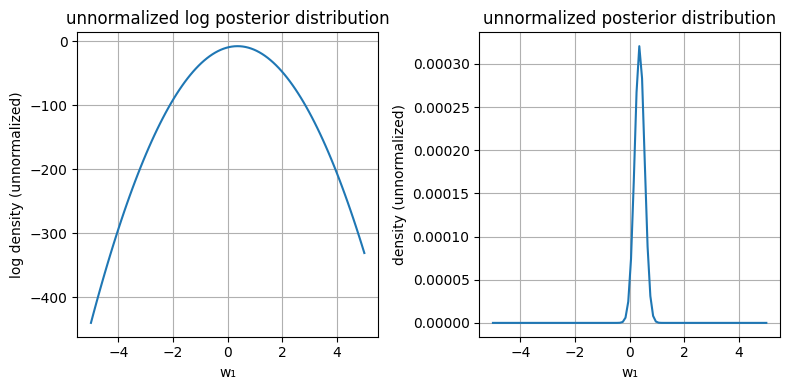

In [8]:
# 非正規化対数事後分布
ulp(w₁) = sum(logpdf.(Normal.(w₁.*X_obs .+ w₂, σ), Y_obs)) + logpdf(Normal(μ₁, σ₁), w₁)

# 分布を表示する範囲
w₁s = range(-5, 5, length=100)

fig, axes = subplots(1, 2, figsize=(8, 4))

# 非正規化対数事後分布の可視化
axes[1].plot(w₁s, ulp.(w₁s))
set_options(axes[1], "w₁", "log density (unnormalized)", "unnormalized log posterior distribution")

# 非正規化事後分布の可視化
axes[2].plot(w₁s, exp.(ulp.(w₁s)))
set_options(axes[2], "w₁", "density (unnormalized)", "unnormalized posterior distribution")

tight_layout()

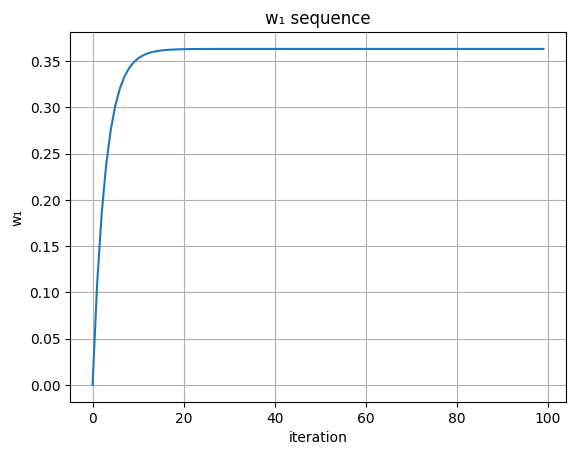

false

In [10]:
# 勾配法（１　dim）
function gradient_method_1dim(f, x_init, η, maxiter)
    f′(x) = ForwardDiff.derivative(f, x)
    x_seq = Array{typeof(x_init)}(undef, maxiter)
    x_seq[1] = x_init
    for i in 2:maxiter
        x_seq[i] = x_seq[i-1] + η*f′(x_seq[i-1])
    end
    x_seq
end

# 最適化パラメータ
w₁_init = 0.0
maxiter = 100
η = 0.01

# 最適化の実施
w₁_seq = gradient_method_1dim(ulp, w₁_init, η, maxiter)

# 勾配法の過程を可視化
fig, ax = subplots()
ax.plot(w₁_seq)
set_options(ax, "iteration", "w₁", "w₁ sequence")

In [ ]:
# 最適化パラメータ
w₁_init = 0.0
maxiter = 100
η = 0.01

# 最適化のラッパー関数を定義
function inference_wrapper_gd_1dim(log_joint, params, w₁_init, η, maxiter)
    ulp(w₁) = log_joint(w₁, params...)
    w₁_seq = gradient_method_1dim(ulp, w₁_init, η, maxiter)
    w₁_seq
end

# 対数同時分布
log_joint(w₁, w₂, X, Y, σ, μ₁, σ₁) = sum(logpdf.(Normal.(w₁.*X .+ w₂)))